#About Churn Project

Retention of users is very important in companies, websites or telecommunication companies. Involving potential customers in our company, attracting customers who are considering leaving, or identifying customers that we cannot keep no matter what we do and not investing more will return us positive in terms of efficiency.For these reasons, churn analysis allows us to take action in advance and improve our marketing and investment techniques in this direction.

# About Dataset

customerID - customer id

gender - client gender (male / female)

SeniorCitizen - is the client retired (1, 0)

Partner - is the client married (Yes, No)

tenure - how many months a person has been a client of the company

PhoneService - is the telephone service connected (Yes, No)

MultipleLines - are multiple phone lines connected (Yes, No, No phone service)

InternetService - client's Internet service provider (DSL, Fiber optic, No)

OnlineSecurity - is the online security service connected (Yes, No, No internet service)

OnlineBackup - is the online backup service activated (Yes, No, No internet service)

DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

TechSupport - is the technical support service connected (Yes, No, No internet service)

StreamingTV - is the streaming TV service connected (Yes, No, No internet service)

StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)

Contract - type of customer contract (Month-to-month, One year, Two year)

PaperlessBilling - whether the client uses paperless billing (Yes, No)

PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - current monthly payment

TotalCharges - the total amount that the client paid for the services for the entire time

Churn - whether there was a churn (Yes or No)

In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
import seaborn as sns # some graphs
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick #for specifying the axes thick format
import warnings
warnings.simplefilter("ignore")
import io #reading files for all systems


In [8]:
#loading csv file from local to colab
from google.colab import files
uploaded = files.upload()

Saving telecom_users.csv to telecom_users.csv


In [9]:
#loading csv file from local to colab
customer = pd.read_csv(io.BytesIO(uploaded['telecom_users.csv']))
customer = customer.dropna()
customer.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [10]:
#loading csv local
customer = pd.read_csv('telecom_users.csv')
customer = customer.dropna()
customer.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# A Closer Look at Our Dataset

In [11]:
customer.columns.values #checking column names

array(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

In [12]:
customer.info() #general information about columns types and null values together

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [13]:
#total charges should be numerical variable we fixed that here. It was object type at the beginning
customer.TotalCharges = pd.to_numeric(customer.TotalCharges, errors='coerce') 
customer=customer.dropna()
customer.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
#we eliminate first 2 columns(Unnamed: 0 and Customer ID columns) because theye are not related for our predict values. 
df = customer.iloc[:,2:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


#### We are going to convert the yes no variables in a binary numeric variable here because we will apply dummies method. If we have N features we have N-1 dummies variables. Because if we use the dummies method in cases that express a variable in essence (for example, in the case of being a woman or a man, or yes or no situtation), we will have an unnecessary columns. For example, in the case of PaperlessBilling, a Yes status would be 1, No status will be 0. However, if we express the PaperlessBilling variable as 0-1 in a single column, we will not fall into the curse of dimensionality.

In [24]:
df["Churn"].replace(to_replace="Yes", value=1, inplace=True) #converting the predictor variable in a binary numeric variable here 
df["Churn"].replace(to_replace="No", value=0, inplace=True)
df["Partner"].replace(to_replace="Yes", value=1, inplace=True) #converting the Partner variable in a binary numeric variable here 
df["Partner"].replace(to_replace="No", value=0, inplace=True)
df["Dependents"].replace(to_replace="Yes", value=1, inplace=True) #converting the Dependents variable in a binary numeric variable here 
df["Dependents"].replace(to_replace="No", value=0, inplace=True)
df["PaperlessBilling"].replace(to_replace="Yes", value=1, inplace=True) #converting the PaperlessBilling variable in a binary numeric variable here 
df["PaperlessBilling"].replace(to_replace="No", value=0, inplace=True)
df["PhoneService"].replace(to_replace="Yes", value=1, inplace=True) #converting the PhoneService variable in a binary numeric variable here 
df["PhoneService"].replace(to_replace="No", value=0, inplace=True)
df["gender"].replace(to_replace="Male", value=1, inplace=True) #converting the gender variable in a binary numeric variable here 
df["gender"].replace(to_replace="Female", value=0, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,0,44,1,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,0,1,1,0,38,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,1,0,0,0,4,1,No,DSL,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.50,0
4,1,0,0,0,2,1,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.50,0


In [25]:
#turnin categorical variables(more than 3 classes including) to zeros and ones with dummies
df_dummies = pd.get_dummies(df)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,72,1,0,24.10,1734.65,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0,0,0,0,44,1,1,88.15,3973.20,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
2,0,1,1,0,38,1,1,74.95,2869.85,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,4,1,1,55.90,238.50,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,53.45,119.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [26]:
#We are looking for correlation
df_dummies.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.007322,-0.007460,0.008643,0.003617,-0.006170,-0.013973,-0.013417,-0.003364,-0.009377,-0.002105,0.006170,-0.001590,0.008207,-0.010869,0.003633,0.016105,0.003633,-0.021122,0.014580,0.003633,-0.018296,0.000519,0.003633,-0.003686,0.005873,0.003633,-0.009761,0.005209,0.003633,-0.008309,0.005104,0.003633,-0.008168,-0.004797,0.015975,-0.009739,-0.017203,0.002270,0.007232,0.006573
SeniorCitizen,-0.007322,1.000000,0.015346,-0.213563,0.004503,0.009231,0.155442,0.219009,0.093160,0.149726,-0.126118,-0.009231,0.132937,-0.107680,0.255842,-0.184457,0.185434,-0.184457,-0.037475,0.091739,-0.184457,0.063545,0.093749,-0.184457,0.061556,0.207006,-0.184457,-0.061090,0.052886,-0.184457,0.102486,0.038746,-0.184457,0.116494,0.141155,-0.041164,-0.125103,-0.013321,-0.029141,0.170126,-0.149715
Partner,-0.007460,0.015346,1.000000,0.448684,0.384269,0.025797,-0.017177,0.105204,0.322968,-0.146378,-0.133240,-0.025797,0.150110,-0.007904,0.006707,0.001045,-0.139352,0.001045,0.153241,-0.145121,0.001045,0.150043,-0.146907,0.001045,0.152729,-0.115151,0.001045,0.125955,-0.130043,0.001045,0.129998,-0.122175,0.001045,0.121434,-0.285318,0.084288,0.251833,0.099743,0.097370,-0.086587,-0.096607
Dependents,0.008643,-0.213563,0.448684,1.000000,0.167677,0.000294,-0.111229,-0.113888,0.065459,-0.159025,0.021767,-0.000294,-0.021808,0.051455,-0.166520,0.141621,-0.192958,0.141621,0.084746,-0.138752,0.141621,0.022271,-0.126343,0.141621,0.009594,-0.177707,0.141621,0.067592,-0.100598,0.141621,-0.018306,-0.081810,0.141621,-0.037320,-0.229486,0.063420,0.206752,0.041413,0.078852,-0.156371,0.057639
tenure,0.003617,0.004503,0.384269,0.167677,1.000000,0.009668,0.005278,0.255676,0.827439,-0.350420,-0.330257,-0.009668,0.339378,0.009399,0.025484,-0.041666,-0.267053,-0.041666,0.333373,-0.310462,-0.041666,0.358826,-0.314264,-0.041666,0.364705,-0.265411,-0.041666,0.330226,-0.248456,-0.041666,0.285228,-0.261314,-0.041666,0.296686,-0.647753,0.199273,0.564137,0.229061,0.236018,-0.202272,-0.230213
PhoneService,-0.006170,0.009231,0.025797,0.000294,0.009668,1.000000,0.021517,0.251798,0.116877,0.009097,0.314690,-1.000000,0.284517,-0.454799,0.292582,0.172899,-0.062464,0.172899,-0.088082,-0.096062,0.172899,-0.049087,-0.075055,0.172899,-0.071106,-0.061638,0.172899,-0.088645,-0.123918,0.172899,-0.021240,-0.114393,0.172899,-0.031032,-0.002654,-0.006237,0.009081,0.011558,-0.013462,0.005208,-0.004002
PaperlessBilling,-0.013973,0.155442,-0.017177,-0.111229,0.005278,0.021517,1.000000,0.355469,0.162113,0.188653,-0.154618,-0.021517,0.169122,-0.066162,0.329999,-0.322100,0.261309,-0.322100,0.003712,0.147518,-0.322100,0.124147,0.166044,-0.322100,0.105043,0.231767,-0.322100,0.036267,0.046130,-0.322100,0.225478,0.060623,-0.322100,0.210466,0.174109,-0.053207,-0.151975,-0.018405,-0.019777,0.210183,-0.199015
MonthlyCharges,-0.013417,0.219009,0.105204,-0.113888,0.255676,0.251798,0.355469,1.000000,0.656534,0.186122,-0.340016,-0.251798,0.495081,-0.162862,0.785723,-0.760743,0.350910,-0.760743,0.303377,0.202055,-0.760743,0.445442,0.168858,-0.760743,0.481627,0.315169,-0.760743,0.341577,0.013440,-0.760743,0.628666,0.012344,-0.760743,0.628068,0.053261,0.005839,-0.06

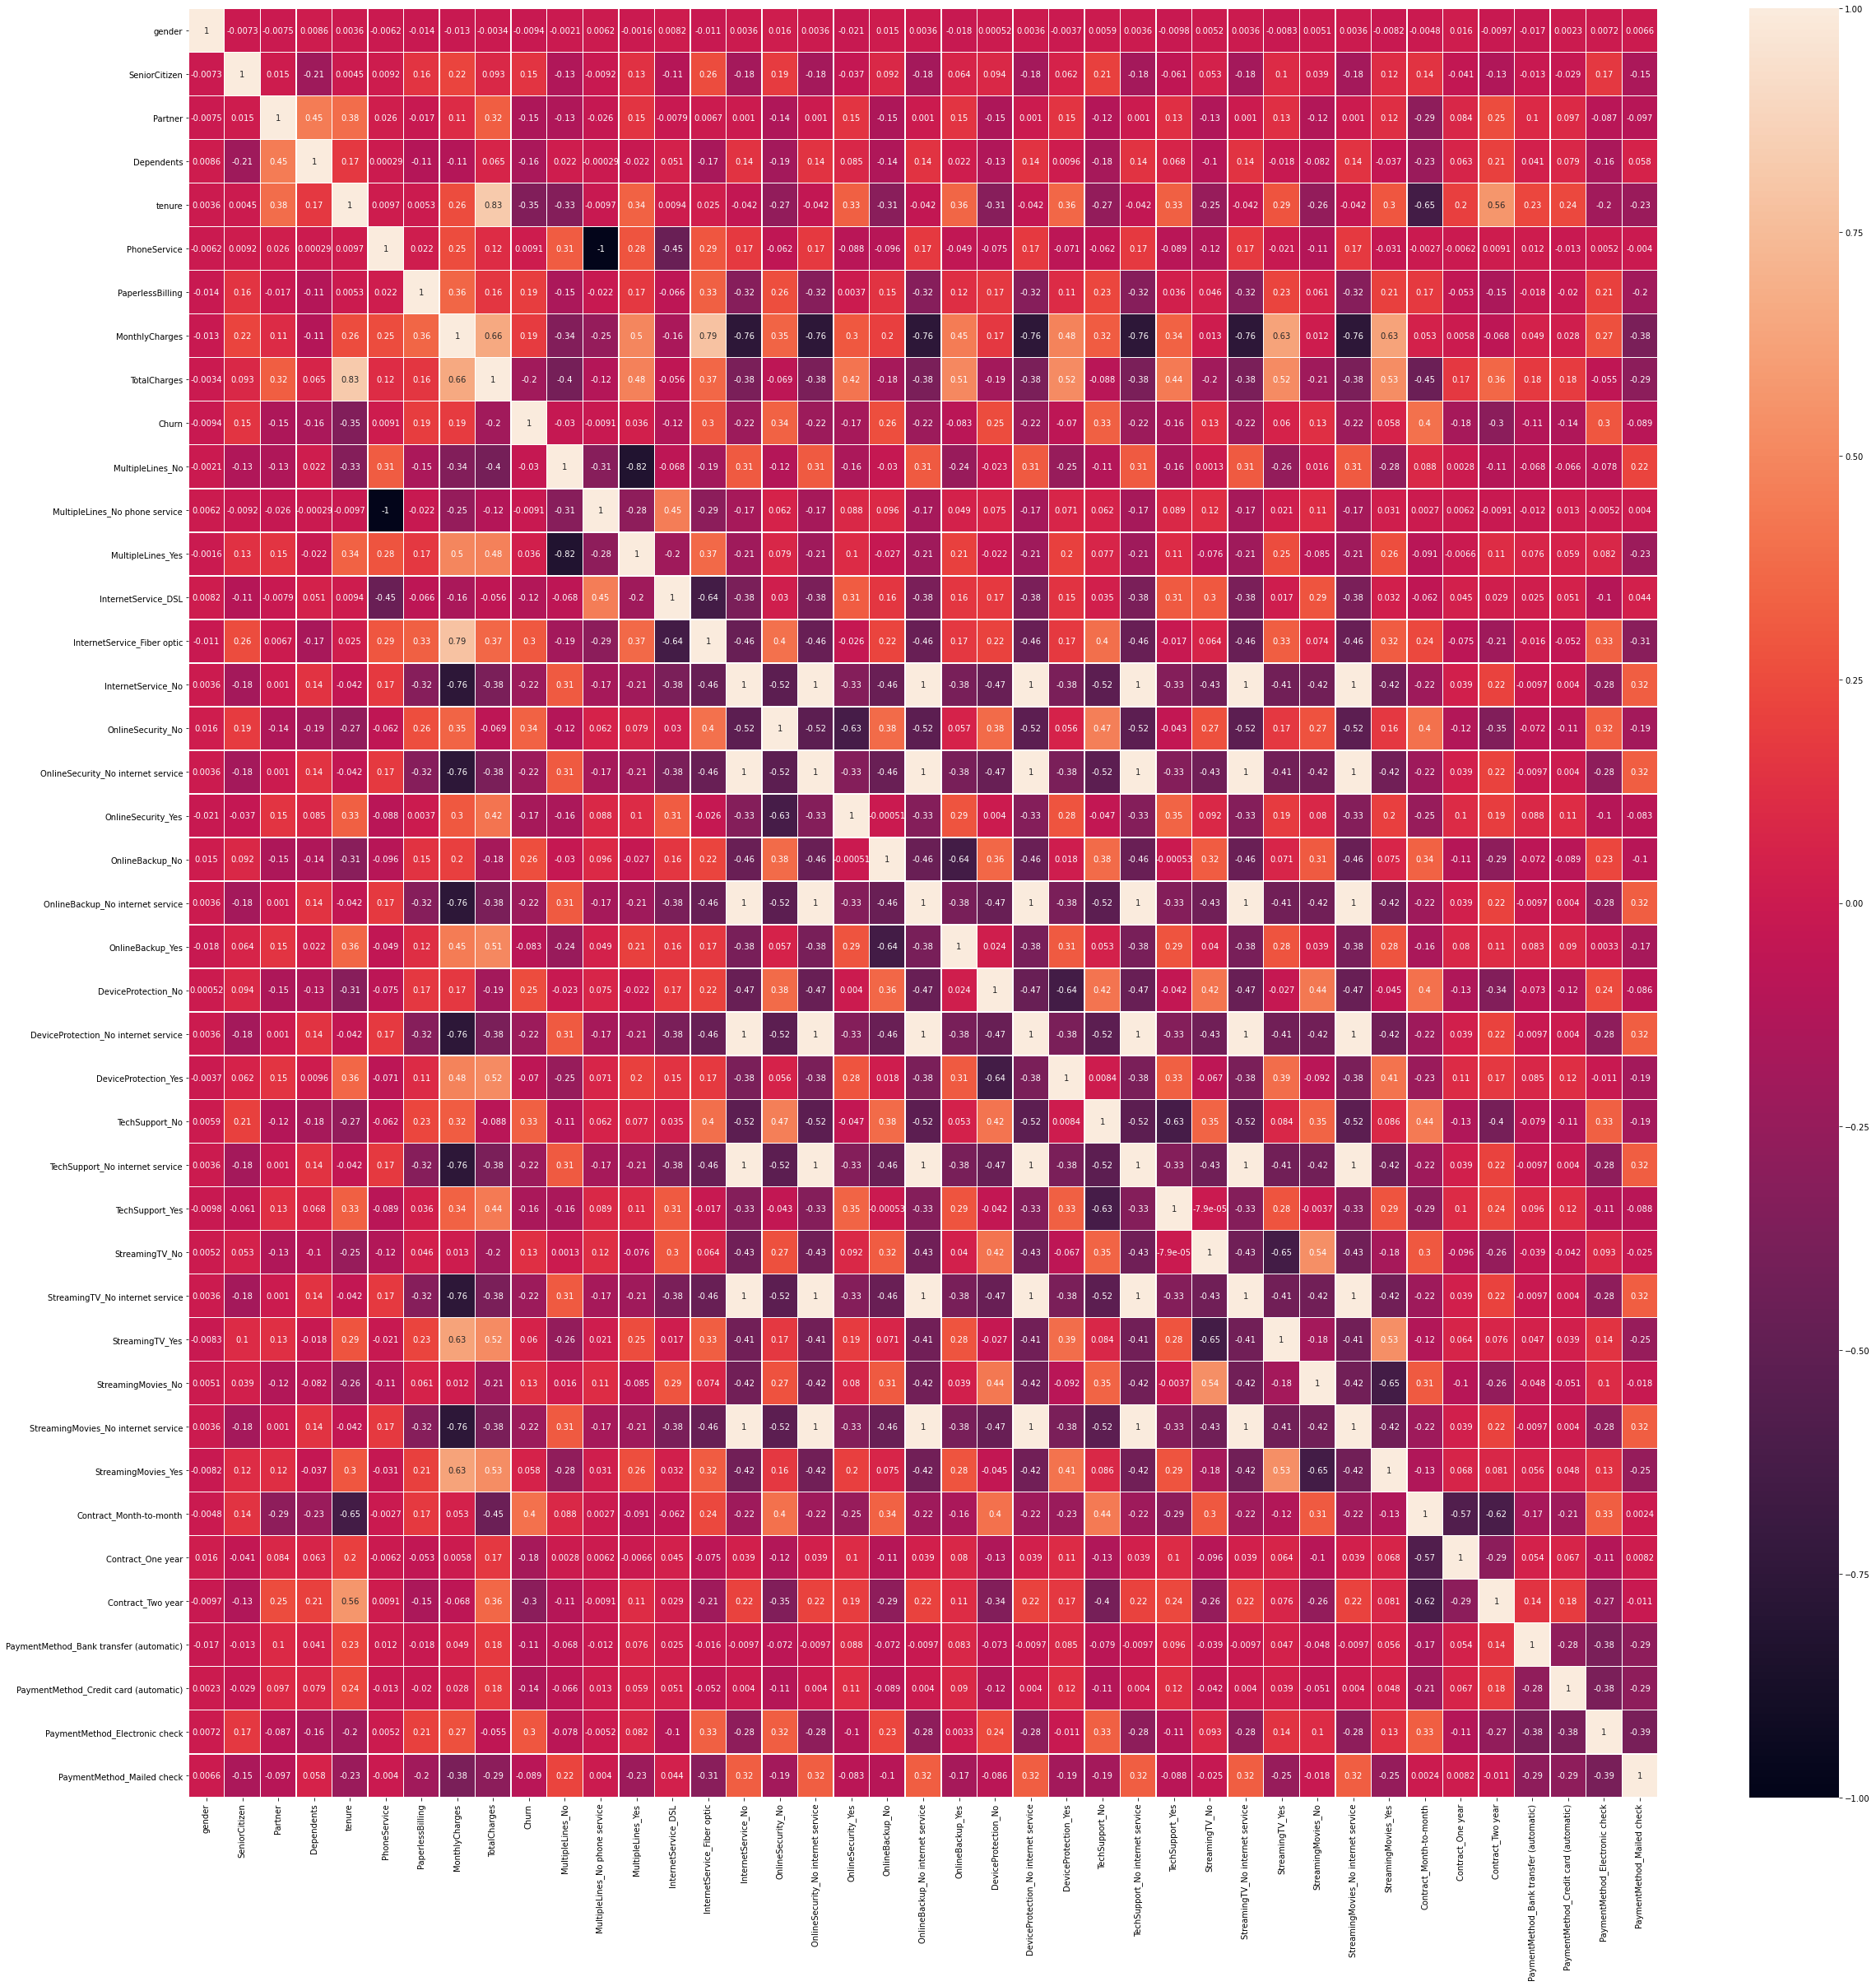

In [ ]:
#actually it doesn't seems clearly cuz there are too many columns. we can do this another way as below
df_corr=df_dummies.corr()
fig, ax = plt.subplots(figsize=(40,40)) # Sample figsize in inches
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax);

We are looking for correlation bar plot to see clearly. If we have less features correlation heatmap could appear. The correlation heatmap would look clearer if we had fewer features. Since it was not so, we showed this situation with a bar plot.

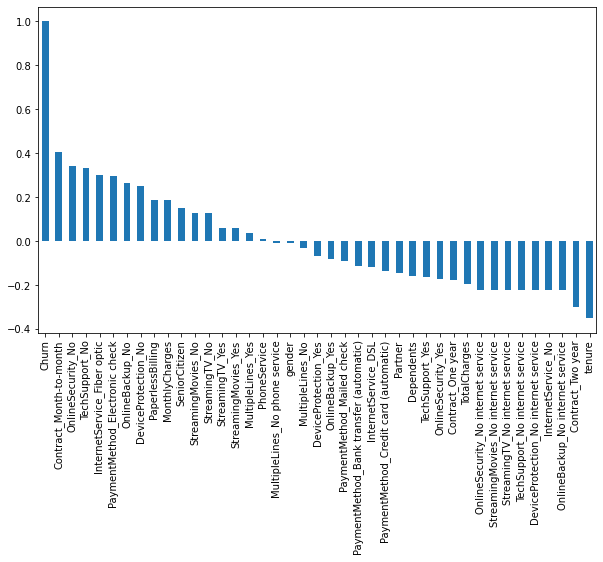

In [28]:
plt.figure(figsize=(10,6))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

#### As we see from the bar plot month-to-month contract, not having online security and tech saport services positive correlated with churn. Tenure and two years contract are negative correlated with churn. We will now examine these matters a little. Also we can see that gender,PhoneService, MultipleLines and StreamingTV are less efective columns. So we can drop them too.

In [38]:
#as we can see less effective columns are gender,PhoneService, MultipleLines and StreamingTV can be dropped.
df1=df.drop(columns=["gender","PhoneService","MultipleLines", "StreamingTV"], axis=1)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,44,Fiber optic,No,Yes,Yes,No,No,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,1,1,0,38,Fiber optic,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,0,0,0,4,DSL,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.50,0
4,0,0,0,2,DSL,Yes,No,Yes,No,No,Month-to-month,0,Electronic check,53.45,119.50,0


In [39]:
#turnin categorical variables(more than 3 classes including) to zeros and ones with dummies
df_dummies = pd.get_dummies(df1)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,72,0,24.10,1734.65,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0,0,0,44,1,88.15,3973.20,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,0,38,1,74.95,2869.85,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,0,4,1,55.90,238.50,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
4,0,0,0,2,0,53.45,119.50,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


In [40]:
df_dummies.corr() #ou 41 columns decresed to 33

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015346,-0.213563,0.004503,0.155442,0.219009,0.093160,0.149726,-0.107680,0.255842,-0.184457,0.185434,-0.184457,-0.037475,0.091739,-0.184457,0.063545,0.093749,-0.184457,0.061556,0.207006,-0.184457,-0.061090,0.038746,-0.184457,0.116494,0.141155,-0.041164,-0.125103,-0.013321,-0.029141,0.170126,-0.149715
Partner,0.015346,1.000000,0.448684,0.384269,-0.017177,0.105204,0.322968,-0.146378,-0.007904,0.006707,0.001045,-0.139352,0.001045,0.153241,-0.145121,0.001045,0.150043,-0.146907,0.001045,0.152729,-0.115151,0.001045,0.125955,-0.122175,0.001045,0.121434,-0.285318,0.084288,0.251833,0.099743,0.097370,-0.086587,-0.096607
Dependents,-0.213563,0.448684,1.000000,0.167677,-0.111229,-0.113888,0.065459,-0.159025,0.051455,-0.166520,0.141621,-0.192958,0.141621,0.084746,-0.138752,0.141621,0.022271,-0.126343,0.141621,0.009594,-0.177707,0.141621,0.067592,-0.081810,0.141621,-0.037320,-0.229486,0.063420,0.206752,0.041413,0.078852,-0.156371,0.057639
tenure,0.004503,0.384269,0.167677,1.000000,0.005278,0.255676,0.827439,-0.350420,0.009399,0.025484,-0.041666,-0.267053,-0.041666,0.333373,-0.310462,-0.041666,0.358826,-0.314264,-0.041666,0.364705,-0.265411,-0.041666,0.330226,-0.261314,-0.041666,0.296686,-0.647753,0.199273,0.564137,0.229061,0.236018,-0.202272,-0.230213
PaperlessBilling,0.155442,-0.017177,-0.111229,0.005278,1.000000,0.355469,0.162113,0.188653,-0.066162,0.329999,-0.322100,0.261309,-0.322100,0.003712,0.147518,-0.322100,0.124147,0.166044,-0.322100,0.105043,0.231767,-0.322100,0.036267,0.060623,-0.322100,0.210466,0.174109,-0.053207,-0.151975,-0.018405,-0.019777,0.210183,-0.199015
MonthlyCharges,0.219009,0.105204,-0.113888,0.255676,0.355469,1.000000,0.656534,0.186122,-0.162862,0.785723,-0.760743,0.350910,-0.760743,0.303377,0.202055,-0.760743,0.445442,0.168858,-0.760743,0.481627,0.315169,-0.760743,0.341577,0.012344,-0.760743,0.628068,0.053261,0.005839,-0.067715,0.049261,0.027662,0.269427,-0.379051
TotalCharges,0.093160,0.322968,0.065459,0.827439,0.162113,0.656534,1.000000,-0.197632,-0.056409,0.365467,-0.376236,-0.069169,-0.376236,0.418603,-0.176166,-0.376236,0.507473,-0.188635,-0.376236,0.522803,-0.088151,-0.376236,0.437855,-0.210658,-0.376236,0.527628,-0.447572,0.168206,0.360508,0.179275,0.182723,-0.054918,-0.294600
Churn,0.149726,-0.146378,-0.159025,-0.350420,0.188653,0.186122,-0.197632,1.000000,-0.120423,0.300297,-0.223416,0.341085,-0.223416,-0.174280,0.264757,-0.223416,-0.082841,0.251938,-0.223416,-0.070168,0.330572,-0.223416,-0.161985,0.129615,-0.223416,0.058320,0.403332,-0.176276,-0.301171,-0.112614,-0.135629,0.296304,-0.089148
InternetService_DSL,-0.107680,-0.007904,0.051455,0.009399,-0.066162,-0.162862,-0.056409,-0.120423,1.000000,-0.643321,-0.380167,0.029612,-0.380167,0.312876,0.163682,-0.380167,0.157377,0.174011,-0.380167,0.146952,0.034501,-0.380167,0.306246,0.287627,-0.380167,0.032088,-0.062251,0.045218,0.029197,0.024638,0.050566,-0.104956,0.044120
InternetService_Fiber optic,0.255842,0.006707,-0.166520,0.025484,0.329999,0.785723,0.365467,0.300297,-0.643321,1.000000,-0.463544,0.403989,-0.463544,-0.025563,0.223900,-0.463544,0.166597,0.218560,-0.463544,0.172505,0.395990,-0.463544,-0.016626,0.073587,-0.463544,0.316561,0.239064,-0.075283,-0.206536,-0.015588,-0.051738,0.333538,-0.309204


We repeat what we did earlier. We can observe our simplified graphs with more effective variables. If you want less variable you can drop columns whic are StreamingMovies , DeviceProtection_Yes, OnlineBackup_Yes etc.

In [ ]:
df_corr=df_dummies.corr()
fig, ax = plt.subplots(figsize=(40,40)) # Sample figsize in inches
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax);

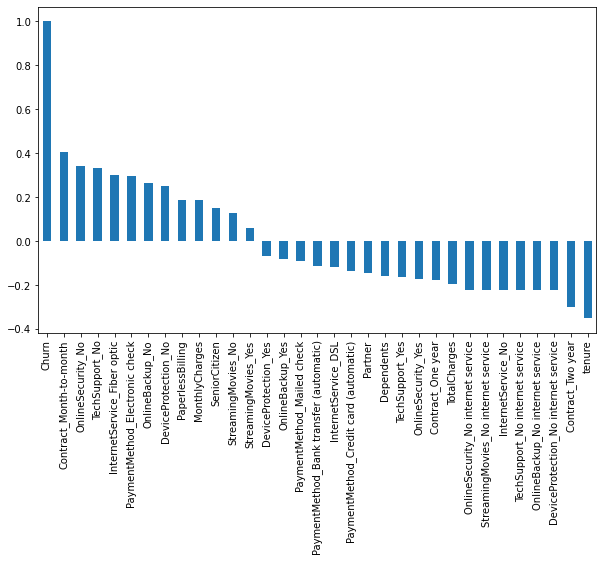

In [41]:
#as you see less significant columns are gone.
plt.figure(figsize=(10,6))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Data Exploration
We want to figure it out that which features affects churn deeply. Because of that we can explore distributions into data set. we'll look at Demographics(Gender-Senior Status,Partner-Dependent Status) first. Secondly we will look at Customer Account Information(tenure,contracts). After that which services are using we examine. Further more we wiil take a quick look at the relation between monthly and total charges. Finally we will be looking at the churn value, which is our target variable.

## Gender and Senior Citizen Status
When we look at the gender distribution, we see that the distribution is proportional, almost equal. I wonder how many Senior Citizens are in the dataset as a percentage.

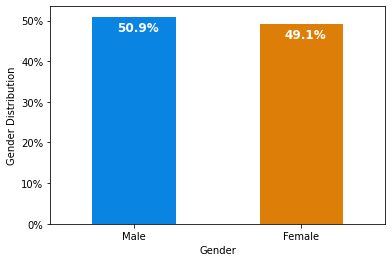

In [ ]:
colors = ['#0984e2','#dd7e08']
ax = (customer["gender"].value_counts()*100.0 /len(customer)).plot(kind="bar",
                                                                   stacked=True, 
                                                                   rot=0, 
                                                                   color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("% Customers")
ax.set_xlabel("Gender")
ax.set_ylabel("% Customers")
ax.set_ylabel("Gender Distribution")

#collecting the plt.peatches data into a list
totals=[] 

#find the values aand appends to list
for i in ax.patches: 
  totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals) 

for i in ax.patches:
  # get_width pulls left or right; get_y pushes up or down
  ax.text(i.get_x()+.15, i.get_height()-3.5,
          str(round((i.get_height()/total), 1))+"%",
          fontsize=12,
          color="white",
          weight="bold")


## Senior Citizen

As you saw there are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

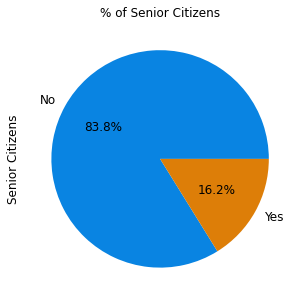

In [ ]:
colors = ['#0984e2','#dd7e08']
ax = (customer['SeniorCitizen'].value_counts()*100.0 /len(customer))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 , colors=colors)                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12);

## Partner and Dependent Status
We have about 50% of the customers have a partner, while only 30% of the total customers have dependents. I wonder how many percentage customers have partners also have dependents. To see this, we look at the next graph below.

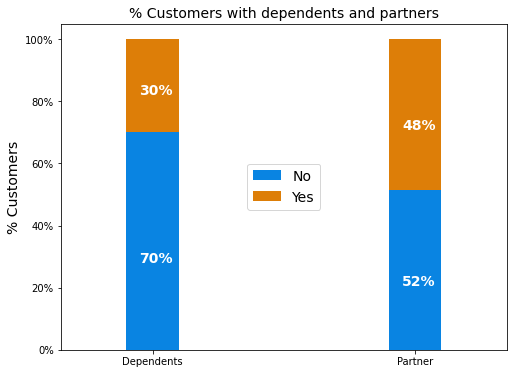

In [ ]:
df1 = pd.melt(customer, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df2 = df1.groupby(['variable','value']).count().unstack()
df2 = df2*100/len(customer)
colors = ['#0984e2','#dd7e08']
ax = df2.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

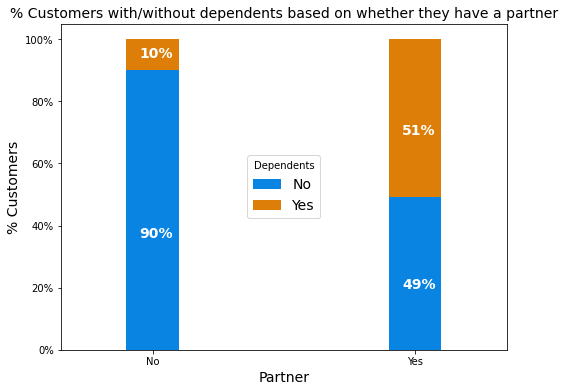

In [ ]:
colors = ['#0984e2','#dd7e08']
partner_dependents = customer.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents .

## Tenure and Contracts
As you saw from histogram below nearly 700 people has 1 month contract also nearly 500 people has 72 months contract. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

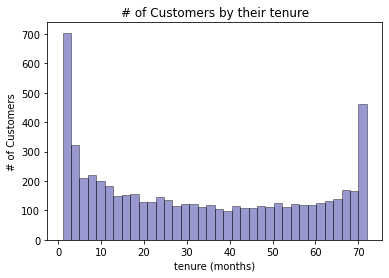

In [ ]:
ax = sns.distplot(customer['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});
ax.set_ylabel('# of Customers')
ax.set_xlabel('tenure (months)')
ax.set_title('# of Customers by their tenure');

As you can see from the graph below, many customers have month-to-month contracts. The sum of two-year and one-year contract holders is equal to the number of month-to-month contract holders.

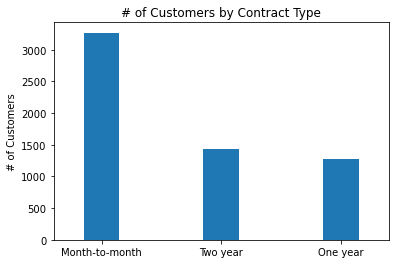

In [ ]:
ax = customer['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type');

People with a month-to-month contract are likely to leave at the end of the month. Customers who sign a two-year contract are not likely to leave for 24 months. Except paying the withdrawal fee and leaving. As can be seen from these graphs below, we see that customers with two-year contracts mostly do not leave for 70 months. In other words, we can observe from these graphs that they are more loyal than those who signed month-to-month contracts.

Text(0.5, 1.0, 'Two Year Contract')

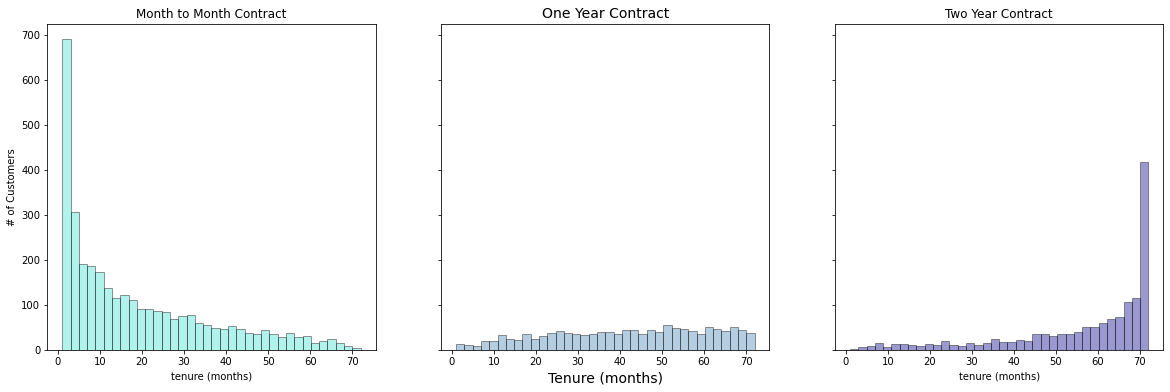

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(customer[customer['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(customer[customer['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(customer[customer['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('tenure (months)')
ax.set_title('Two Year Contract')

## Using Services Status
According to the use of telephone services we can not clearly derive meaning. As you can see from the graphs, there is not much difference between them except PhoneService. Since the values in other services are very close to each other, we cannot think that it has a clear effect.

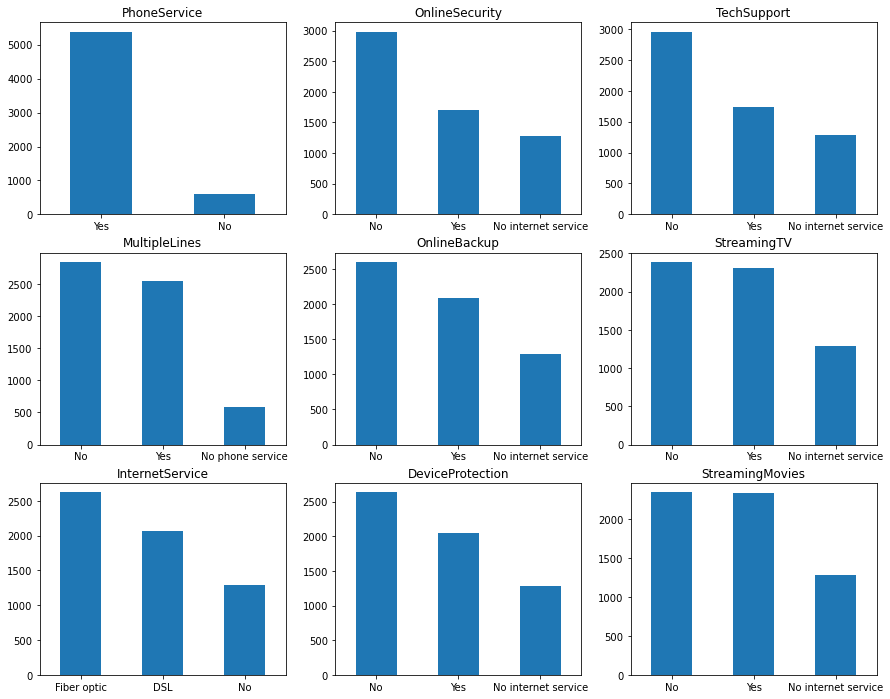

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = customer[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

## Churn Status
As the last and most important step of data exploration, let's examine the our dependent variable correlation with other variables.

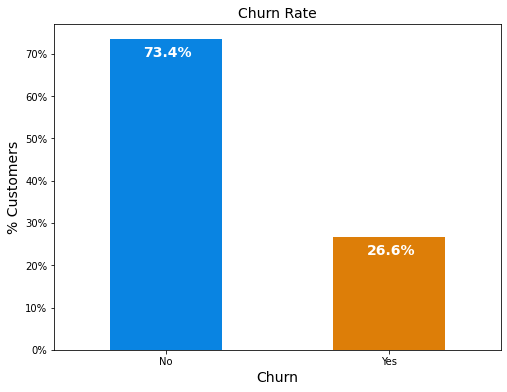

In [ ]:
colors = ['#0984e2','#dd7e08']
ax = (customer['Churn'].value_counts()*100.0 /len(customer)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

As a result of our previous examinations, we would expect to see a lower "No" rate as opposed to the 73.4% "No" in the current chart. With this in mind, we continue our target variable examinations. Contrary to what we expected, we will examine the situation of this ratio and fix it in the modeling section.

Now we are going to examine Chrun correlation with tenure,seniority,contract type,monthly charges and total charges.

### Churn vs *Tenure*
As seen in the chart below, long-term users (between 20 and 60 months) tend to churn less than new users.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

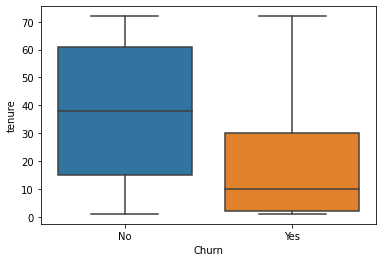

In [ ]:
sns.boxplot(x = customer.Churn, y= customer.tenure)

### Churn vs *Contract Type*
As we saw earlier in the correlation table, customers with month-to-month contracts are more likely to churn.

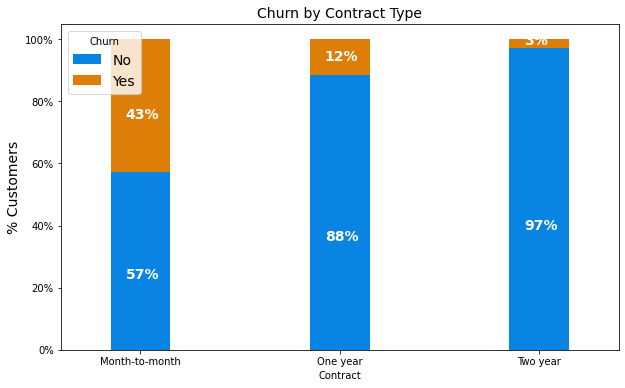

In [ ]:
colors = ['#0984e2','#dd7e08']
contract_churn = customer.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## Churn vs *Senior Citizens*
In this table above, we see that senior citizens tend to churn 18% more than young people. This rate may seem small, but it is almost doubled.

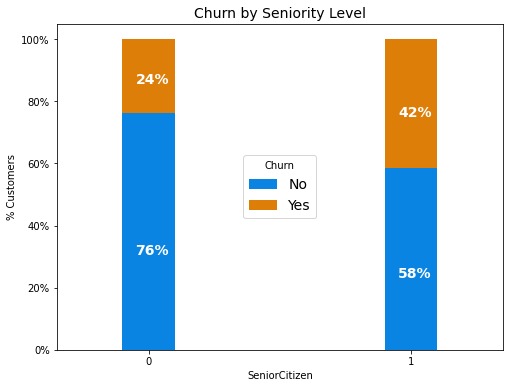

In [ ]:
colors = ['#0984e2','#dd7e08']
seniority_churn = customer.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

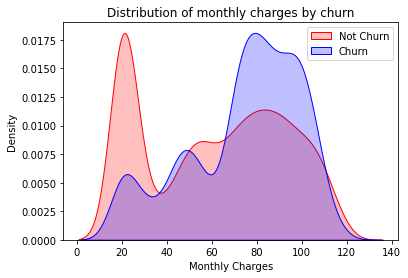

In [ ]:
ax = sns.kdeplot(customer.MonthlyCharges[(customer["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(customer.MonthlyCharges[(customer["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

Customers with higher monthly payments are more likely to churn. We see that churn is increasing with monthly payments. So positively correlated. which is bad for company. 

## Churn vs Total Charges
The churn seems like more when the total amount paid is less. Normally, when the total amount paid is high, there may be a thought that the amount of churn should also be high. However, it should be noted that it is normal for the customers who stay for a long time to pay more than the customers who chrun in a short time.

Text(0.5, 1.0, 'Distribution of total charges by churn')

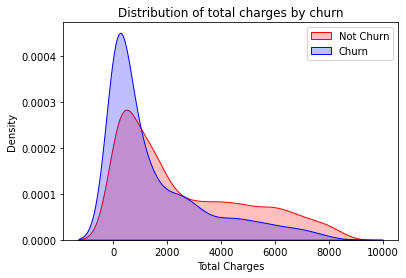

In [ ]:
ax = sns.kdeplot(customer.TotalCharges[(customer["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(customer.TotalCharges[(customer["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Model


In [82]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

We used here MinMaxScaler for transforming features by scaling each feature to a given range.



In [64]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Spilttinh Train and Test datasets

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
#we are trying to finding best option for parameters. There are values for trying.
param_grid = {
    "max_depth": [2,3,4,5,10],
    "learning_rate": [0.1, 0.01, 0.05, 1.0, 3],
    "gamma": [0,0.25,1.0, 1.5, 2],
    "reg_lambda": [0, 2.0, 1.0, 10.0,100],
    "scale_pos_weight": [1,3,5,7,10]
}


In [59]:
#for optimizing best params for our data set(TUNING)
optimal_params = GridSearchCV( estimator=xgb.XGBClassifier(objective="binary:logistic",
                                                           seed =42,),
                                                           param_grid=param_grid,
                                                           scoring="accuracy",
                                                           verbose=0,
                                                           n_jobs=-1,
                                                           cv=10)
optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds = 10,
                   eval_metric="auc",
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 2, 'learning_rate': 0.1, 'max_depth': 4, 'reg_alpha': 2.0, 'scale_pos_weight': 1}


We used here learning_rate , gamma , reg_lambda , scale_pos_weight  and max_depth as a hyper parameters.
`gamma`: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be
`max_depth` : Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
`reg_lambda` : L2 regularization term on weights. Increasing this value will make model more conservative.
`scale_pos_weight` : Control the balance of positive and negative weights, useful for unbalanced classes


In [81]:
from xgboost import XGBClassifier
model = XGBClassifier(objective = "binary:logistic", 
                            missing=None, seed=44,
                            learning_rate=0.1,
                            gamma = 0,
                            reg_lambda=0,
                            scale_pos_weight=1,
                            max_depth=4)
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.795872838817624

In [68]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7908533184606804


In [47]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[1161  133]
 [ 242  257]]


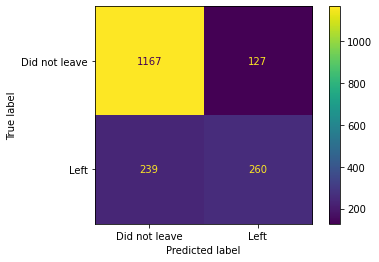

In [73]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format="d",
                      display_labels=["Did not leave", "Left"])


When the confusion matrix above is examined, we see that our model correctly determined that 1167 people left and 260 people left. However, it sees 239 people as not leaving despite leaving, and 127 people as leaving despite not leaving.

As a result I used xgboost algorithm for telecommunication company churn situation. My model has %80 accuracy score. According to the need, this rate can be increased by deleting or ignoring other unimportant variables in the data set.